# **TASK-3**

# **SALES PREDICTION WITH PYTHON**

***BY-KHYATI SINGH***

IMPORTING THE LIBRARIES

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
dataset=pd.read_csv('Advertising.csv')

In [30]:
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [31]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


CORRELATION

In [33]:
dataset.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


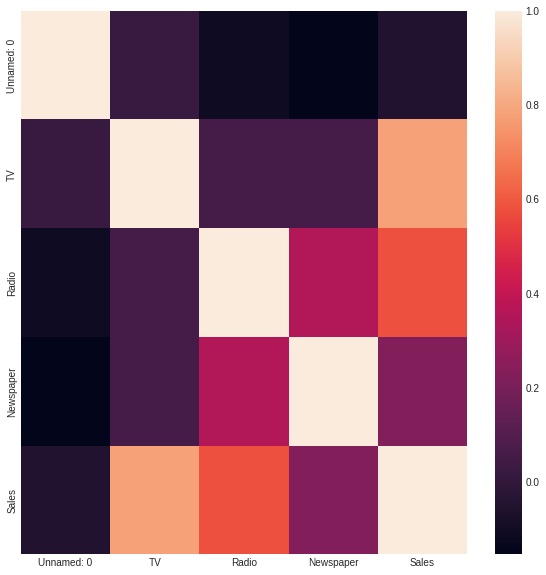

In [34]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr())
plt.show()

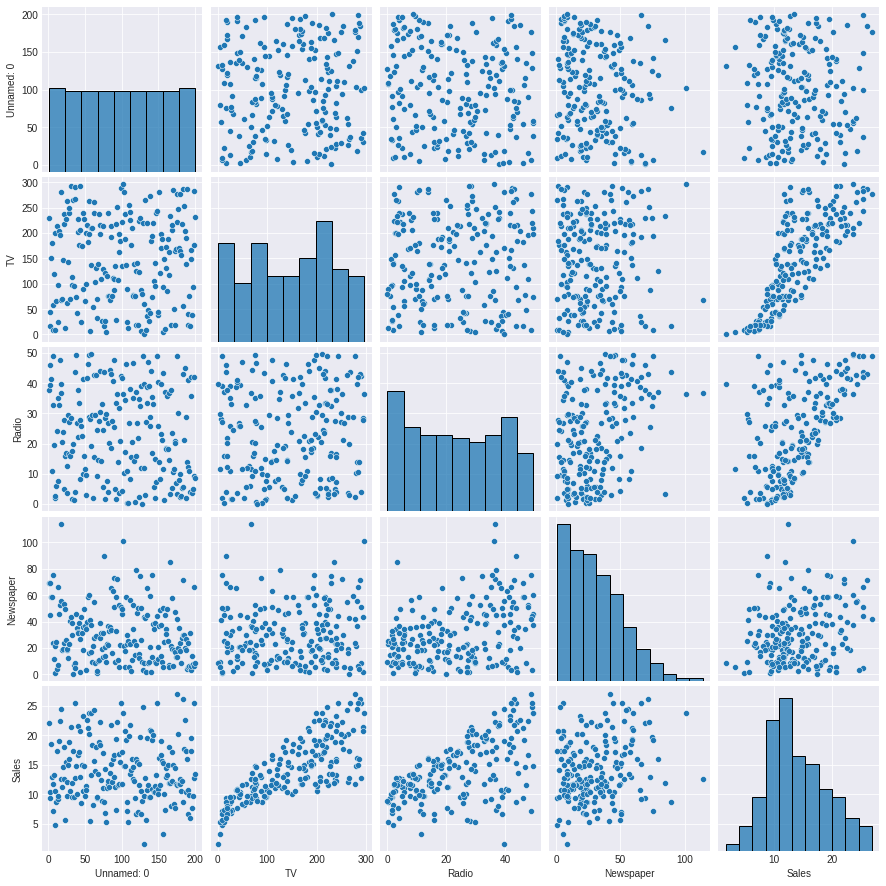

In [35]:
sns.pairplot(dataset)

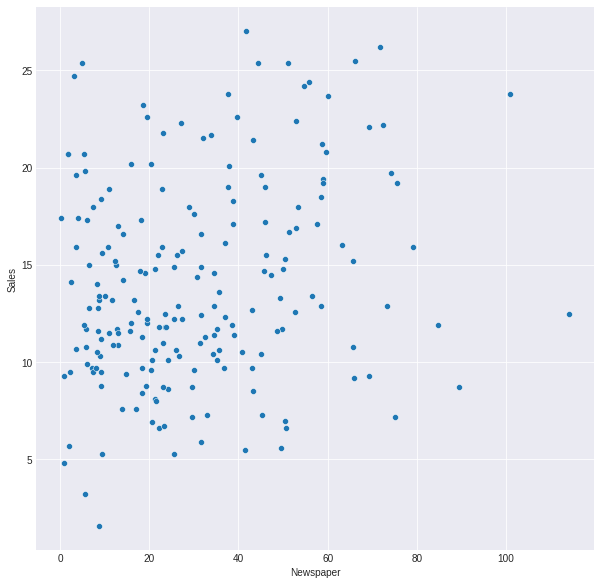

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dataset,x=dataset['Newspaper'],y=dataset['Sales'])
plt.show()

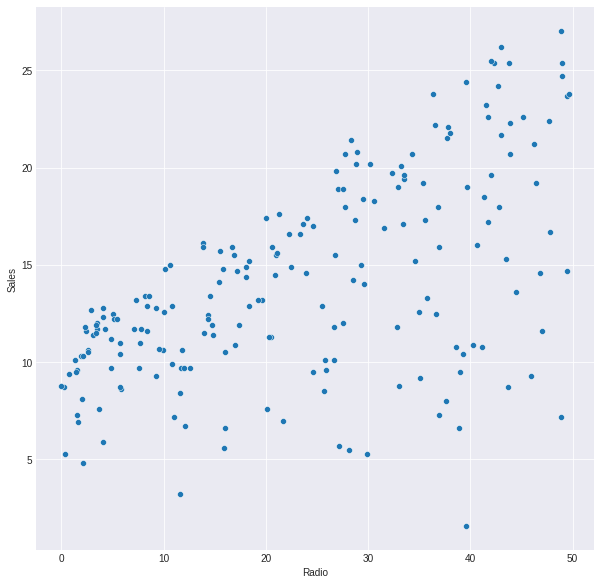

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dataset,x=dataset['Radio'],y=dataset['Sales'])
plt.show()

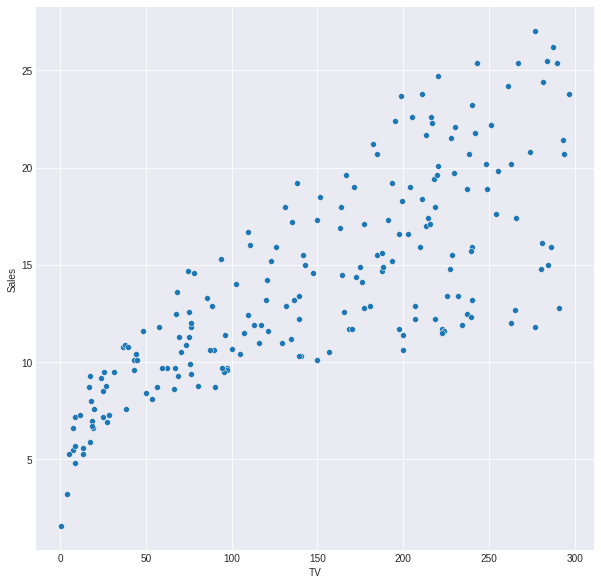

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dataset,x=dataset['TV'],y=dataset['Sales'])
plt.show()

In [39]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [40]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.1, random_state=7)
X_train.shape

(180, 4)

LINEAR REGRESSION

In [45]:
reg= LinearRegression()

In [46]:
reg.fit(X_train, Y_train)    

LinearRegression()

In [50]:
pred = reg.predict(X_test)
compare= pd.DataFrame({"Y_test":list(Y_test), "prediction":list(pred)})
compare

,Y_test,prediction
0,12.0,11.559101
1,15.5,14.400661
2,5.6,6.455779
3,17.4,17.305927
4,7.6,5.217366
5,9.3,12.366927
6,7.0,7.778941
7,11.5,10.415312
8,9.5,8.952210
9,14.0,13.188207


PLOTTING

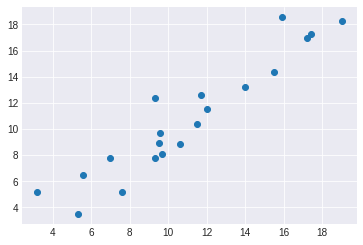

In [52]:
plt.scatter(Y_test, pred)

In [54]:
Mean_Absolute_Error  = metrics.mean_absolute_error(Y_test, pred)
print("Mean Absolute error:{}".format(Mean_Absolute_Error))

Mean_Squared_Error = metrics.mean_squared_error(Y_test, pred)
print('Mean Squared error: {}'.format(np.sqrt(Mean_Squared_Error)))

R2 = metrics.r2_score(Y_test, pred)
print("R2 Score:{}".format(R2))

Mean Absolute error:1.2267337924722592
Mean Squared error: 1.4823125536199742
R2 Score:0.8780150697436433


CHECKING FOR ACCURACY

In [55]:
print("THE ACCURACY IS:",int(R2*100),"%")

THE ACCURACY IS: 87 %
